# Data Splitting - Preprocessing - Tranformations
**This notebook:** 
* Defines the data subsets for training the base models on the same sets.
* Performs only the relevant data preprocessing seen in during the Data Exploration phase.
* Performs the data transformatino needed to be compatible with the machine learning models:
    * resizing
    * normalizations
    * vectorization
* The datasets are progressively being saved locally to manage the memory usage. The base models will then reload the needed data tranformed sets according to their requirements.  

**The notebook includes, as example, a simple NN to train on text data and a CNN to train image data mainly to check the usability of the tranformed datasets.**

# Import libraries

In [1]:
import pandas as pd
import numpy as np

import nltk
nltk.download('popular', quiet = True)

import os
import time

%load_ext autoreload
%autoreload 2
import importlib

import Data_Preprocessing_Transformation_tools as dpt
importlib.reload(dpt)

<module 'Data_Preprocessing_Transformation_tools' from 'C:\\Ramiro\\Data Science\\0_DataScientest\\02_DS_project\\Raku_ten_23\\Data_Preprocessing_Transformation_tools.py'>

**Global parameters**

In [2]:
### Create the necessary folders as specified in the following paths:

myseed = 123

images_path = '../datasets/image_train/'      # location of the original datasets
splitting_path = '../Splitted_datasets/'      # location to store the splitted datasets
preprocessing_path = '../Preprocessed_data/'  # location to store the preprocessed and transformed dataset

# training_path = '../Trained_models_and_metrics/'
# fusion_path = '../Fusion_models_and_data/'

### product categories

In [4]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class.head()

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek


# 1 - Import raw dataset
* Define train & test splits. 
* Split datasets. 

### Import raw datasets: features and targets

In [8]:
## import raw datasets: features and target
df_X = pd.read_csv('../datasets/X_train_update.csv', index_col = 0)
df_y = pd.read_csv('../datasets/Y_train_CVw08PX.csv', index_col = 0).squeeze()  ## for correct splitting

print(type(df_X), type(df_y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [9]:
display(df_X.head())
print(df_X.index)

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914,
            84915],
           dtype='int64', length=84916)


In [10]:
display(df_y.head())
print(df_y.index)

0      10
1    2280
2      50
3    1280
4    2705
Name: prdtypecode, dtype: int64

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914,
            84915],
           dtype='int64', length=84916)


### Define train test splitting

In [11]:
from sklearn.model_selection import train_test_split

## train-test split raw data
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, \
                                                                random_state = myseed, stratify = df_y)


In [11]:
df_y_test.index

Int64Index([76291, 35651, 23689, 27954, 53964, 25569,   462, 76121, 81032,
            80184,
            ...
            43294, 23597, 28244,  7725, 20720, 84173, 53364, 62653, 33334,
            83750],
           dtype='int64', length=16984)

### Save splitted datasets

In [16]:
## save splitted dataframes
dpt.save(datasets = [df_X_train, df_X_test, df_y_train, df_y_test], \
             types = ['dataframe', 'dataframe', 'dataframe', 'dataframe'], \
             names = ['df_X_train', 'df_X_test', 'df_y_train', 'df_y_test'], \
              path = splitting_path, doit = False, verbose = True)


Datasets were not saved locally. Set doit = True to store them


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    From now on, the <b>test dataset</b> will only be used to measure the final models performance on new data.
</div>

# 2 - _Text data_

## 2.1 - Preprocess Text Data
* Clean data
* Feature engineering
* Address NaNs

In [17]:
## preprocess datasets: Data cleaning & Feature engineering

df_X_train_preprocess = dpt.preprocess_text_data(df_X_train, verbose = True)
df_X_test_preprocess = dpt.preprocess_text_data(df_X_test, verbose = True)


Column 'designation' has been renamed as 'title' 

Columns 'title' and 'description' have been concatenated in a new variable 'title_descr' 

Column 'title_descr' has been successfully HTML parsed and decapitalized.
	 HTML parsing takes 17.02 seconds 

Column 'title_descr' has been successfully tokenized.
	 Tokenization + Lemmatization takes 22.46 seconds 

Main language detection takes 4.03 minutes.
	 Language detection correction takes 2.92 seconds 

Removing stop-words takes 30.61 seconds. 

Token counting takes 0.03 seconds. 

Column 'designation' has been renamed as 'title' 

Columns 'title' and 'description' have been concatenated in a new variable 'title_descr' 

Column 'title_descr' has been successfully HTML parsed and decapitalized.
	 HTML parsing takes 4.23 seconds 

Column 'title_descr' has been successfully tokenized.
	 Tokenization + Lemmatization takes 5.21 seconds 

Main language detection takes 0.93 minutes.
	 Language detection correction takes 1.94 seconds 

Removing

In [18]:
df_X_train_preprocess.head()

,title,description,productid,imageid,title_descr,lemma_tokens,language,text_token_len
9263,Lot 3 Livres - Contes Merveilleux,,3618603061,1228606644,lot 3 livres - contes merveilleux \n,"[lot, livres, contes, merveilleux]",fr,4
50884,Amiibo Splatoon Calamar Inkling Violet Néon,,1997652852,1119376033,amiibo splatoon calamar inkling violet néon \n,"[amiibo, splatoon, calamar, inkling, violet, n...",en,6
73788,Atterrissage Prolongée Vitesse De Jambe D'appu...,NOUVEAU Landing Gear Extended Leg support Prot...,4197675553,1313430830,atterrissage prolongée vitesse de jambe d'appu...,"[atterrissage, prolongée, vitesse, jambe, appu...",fr,54
34901,Rideau D'ameublement À Effet Chenille,Rideau de 140 x 260 cm qui saura mettre en ava...,3601180051,1226564377,rideau d'ameublement à effet chenille \n ridea...,"[rideau, ameublement, chenille, 140, 260, saur...",fr,66
81204,Porte-Cartes De Visites Magnetoplan,magnetoplan porte-cartes de visite transparent...,278813457,977811081,porte-cartes de visites magnetoplan \n magneto...,"[porte, carte, visites, magnetoplan, visite, t...",fr,8


### Save Preprocessed datasets

In [12]:
dpt.save(datasets = [df_X_train_preprocess, df_X_test_preprocess], 
             types = ['dataframe', 'dataframe'],
             names = ['df_X_train_preprocess', 'df_X_test_preprocess'], 
              path = preprocessing_path, doit = False, verbose = True)


Saved dataset: ../Preprocessed_data/2308141824_df_X_train_preprocess.csv
Saved dataset: ../Preprocessed_data/2308141824_df_X_test_preprocess.csv


### Load preprocessed data (Optional)
It helps to free processing memory if restarting the kernel and loading the following datasets.

In [3]:
df_X_train_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
df_X_test_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_test_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_y_train = pd.read_csv( splitting_path+'2308141824_df_y_train.csv', header = 0, index_col = 0, sep = ',')
# df_y_test = pd.read_csv( splitting_path+'2308141824_df_y_test.csv', header = 0, index_col = 0, sep = ',')

# df_X_train_preprocess.head()

## 2.2 Transform text data

### Transform text data
* In a format accepted by ML models: np.arrays.
* encode categeorical features
* normalize numerical features
* vectorize tokens
* encode target

In [19]:
## transform dataset to feed into model

text_data, targets, text_transformer, target_transformer = dpt.get_text_data(df_X_train_preprocess, df_X_test_preprocess, 
                                                                            df_y_train, df_y_test)



Vectorizer Vocabulary contains : 5000 terms
First Vocabulary terms : {'lot': 2751, 'livres': 2731, 'merveilleux': 2896, 'violet': 4773, 'atterrissage': 632, 'prolongée': 3663, 'vitesse': 4785, 'appui': 541, 'protector': 3681, 'extension': 1907}


### Save transformed datasets, transformers and encoder objects

In [16]:

## Save transformed features:
dpt.save(datasets = [text_data['X_train'], text_data['X_test'] ], \
             types = ['sparseMatrix', 'sparseMatrix'], \
             names = ['text_data_transformed_X_train', 'text_data_transformed_X_test'], \
              path = preprocessing_path, doit = False, verbose = True )

## save transformed targets:
dpt.save(datasets = [ targets['y_train'], targets['y_test'] ], \
             types = ['array', 'array'], \
             names = ['text_data_transformed_y_train', 'text_data_transformed_y_test'], \
              path = preprocessing_path, doit = False, verbose = True )

## save tranformers:
dpt.save(datasets = [ text_transformer['token_len_scaler'], text_transformer['language_encoder'],\
                     text_transformer['lemmas_vectorizer'], target_transformer], \
             types = ['transformer', 'transformer','transformer', 'transformer'], \
             names = ['token_len_scaler','language_encoder', 'lemmas_vectorizer', 'target_encoder'], \
              path = preprocessing_path, doit = False, verbose = True )


Saved sparseMatrix : ../Preprocessed_data/2308141825_text_data_transformed_X_train.npz
Saved sparseMatrix : ../Preprocessed_data/2308141825_text_data_transformed_X_test.npz
Saved dataset: ../Preprocessed_data/2308141825_text_data_transformed_y_train.npy
Saved dataset: ../Preprocessed_data/2308141825_text_data_transformed_y_test.npy
Saved transformer: ../Preprocessed_data/2308141825_token_len_scaler
Saved transformer: ../Preprocessed_data/2308141825_language_encoder
Saved transformer: ../Preprocessed_data/2308141825_lemmas_vectorizer
Saved transformer: ../Preprocessed_data/2308141825_target_encoder


### Load transformed data (Optional)
Start from here if RAM is limited

**Features**

In [5]:
from scipy import sparse

text_data = {}

text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

**Targets**

In [6]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

**Transformers**

In [54]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

## 2.3 Text modeling

### Initialize text model

In [42]:
## intialize text model:

text_model = dpt.initialize_text_model(model_type  = "NN", \
                             Nb_features = text_data['X_train'].shape[1], \
                             Nb_classes  = targets['y_train'].shape[1])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 256)               1289216   
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,296,155
Trainable params: 1,296,155
Non-trainable params: 0
_________________________________________________________________


None

### Fit text model 

In [43]:
## train model

epochs = 10

training_history = text_model.fit(text_data["X_train"].toarray(), targets["y_train"],
                                  epochs = epochs,
                                  batch_size = 200,
                                  validation_split = 0.2)    ## 


Epoch 1/10
272/272 [==============================] - 10s 13ms/step - loss: 2.3462 - accuracy: 0.4036 - val_loss: 1.4892 - val_accuracy: 0.6494
Epoch 2/10
272/272 [==============================] - 3s 11ms/step - loss: 1.1589 - accuracy: 0.7077 - val_loss: 0.9890 - val_accuracy: 0.7308
Epoch 3/10
272/272 [==============================] - 3s 11ms/step - loss: 0.8498 - accuracy: 0.7653 - val_loss: 0.8485 - val_accuracy: 0.7542
Epoch 4/10
272/272 [==============================] - 3s 11ms/step - loss: 0.7177 - accuracy: 0.7931 - val_loss: 0.7875 - val_accuracy: 0.7623
Epoch 5/10
272/272 [==============================] - 3s 11ms/step - loss: 0.6371 - accuracy: 0.8124 - val_loss: 0.7556 - val_accuracy: 0.7670
Epoch 6/10
272/272 [==============================] - 3s 11ms/step - loss: 0.5788 - accuracy: 0.8276 - val_loss: 0.7380 - val_accuracy: 0.7718
Epoch 7/10
272/272 [==============================] - 3s 11ms/step - loss: 0.5334 - accuracy: 0.8412 - val_loss: 0.7294 - val_accuracy: 0.774

### Evaluate text model

In [47]:
epochs = epochs
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

(0.0, 1.0)

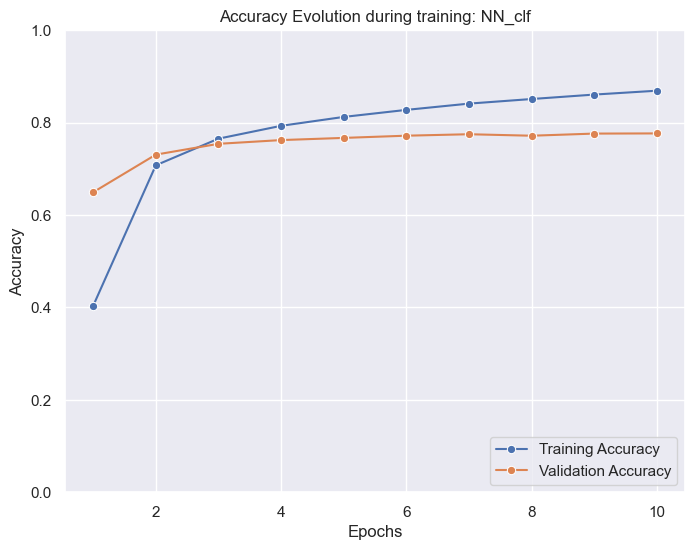

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='lower right')#loc='right'
plt.ylim(0,1)
# plt.ylim(0.3,0.5)
# plt.xlim(0,50)

In [49]:
loss_test, NN_accuracy_test = text_model.evaluate(text_data["X_test"].toarray(), targets["y_test"])
print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

531/531 [==============================] - 2s 3ms/step - loss: 0.7672 - accuracy: 0.7664
Test  set accuracy = 0.766 and loss function = 0.77


# 3 - _Image data_

* preprocess image data: crop, resize, vectorize
* save prpprocessed image_dataset
* transform image data: scale pixels, reshape for CNN
* initialize model (using tranformed data dimensions)
* save trained model
* reload trained model


## 3.1 - Preprocess image data
* crop
* resize
* vectorize

In [5]:

image_train_preprocess = dpt.preprocess_image_data(df_X_train_preprocess, 
                                                     threshold = 230, 
                                                     new_pixel_nb = 100,
                                                     path = images_path,                                                     
                                                     output = 'array',
                                                     verbose = True)


0 images at time 0.00 minutes
1000 images at time 0.13 minutes
2000 images at time 0.26 minutes
3000 images at time 0.39 minutes
4000 images at time 0.53 minutes
5000 images at time 0.66 minutes
10000 images at time 1.31 minutes
15000 images at time 1.96 minutes
20000 images at time 2.62 minutes
25000 images at time 3.27 minutes
30000 images at time 3.92 minutes
35000 images at time 4.57 minutes
40000 images at time 5.20 minutes
45000 images at time 5.84 minutes
50000 images at time 6.49 minutes
55000 images at time 7.13 minutes
60000 images at time 7.78 minutes
65000 images at time 8.44 minutes
Vectorization of 67932 images takes 8.82 minutes


In [6]:
image_test_preprocess = dpt.preprocess_image_data(df_X_test_preprocess, 
                                                     threshold = 230, 
                                                     new_pixel_nb = 100,
                                                     path = images_path,
                                                     output = 'array',
                                                     verbose = True)


0 images at time 0.00 minutes
1000 images at time 0.13 minutes
2000 images at time 0.25 minutes
3000 images at time 0.38 minutes
4000 images at time 0.51 minutes
5000 images at time 0.63 minutes
10000 images at time 1.28 minutes
15000 images at time 1.92 minutes
Vectorization of 16984 images takes 2.18 minutes


### Save preprocessed image data

In [8]:
dpt.save(datasets = [image_train_preprocess, image_test_preprocess], \
            types = ['array', 'array'], \
             names = ['image_train_preprocess_200px', 'image_test_preprocess_200px'], \
              path = preprocessing_path, doit = False, verbose = True)

Saved dataset: ../Preprocessed_data/2308151632_image_train_preprocess_200px.npy
Saved dataset: ../Preprocessed_data/2308151632_image_test_preprocess_200px.npy


### Load preprocessed image data
Optional. It helps to free processing memory if restarting the kernel and loading the followinf datasets.

In [8]:
# df_X_train_preprocess = pd.read_csv('./Preprocessed_data/2308102210_df_image_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_X_test_preprocess = pd.read_csv('./Preprocessed_data/2308102210_df_image_test_preprocess.csv', header = 0, index_col = 0, sep = ',')


## reload saved numpy array for preprocessed image data
import os
## small dataset 100 px by 100 px
image_train_preprocess = np.load(os.path.join(preprocessing_path, '2308141850_df_image_train_preprocess.npy'))
image_test_preprocess = np.load(os.path.join(preprocessing_path, '2308141850_df_image_test_preprocess.npy'))
## large dataset: 200 px by 200 px
# image_train_preprocess = np.load(os.path.join(preprocessing_path, '2308151632_image_train_preprocess_200px.npy'))
# image_test_preprocess = np.load(os.path.join(preprocessing_path, '2308151632_image_test_preprocess_200px.npy'))


## targets are in dataframes
# df_y_train = pd.read_csv(splitting_path + '2308141811_df_y_train.csv', header = 0, index_col = 0, sep = ',')
# df_y_test = pd.read_csv(splitting_path + '2308141811_df_y_test.csv', header = 0, index_col = 0, sep = ',')


## 3.2 Transform image data
* In a format accepted by ML models: np.arrays.
* encode categeorical features
* normalize numerical features
* vectorize tokens
* encode target

In [9]:
image_train_preprocess.shape

(67932, 30000)

In [10]:
image_data = dpt.get_image_data(image_train_preprocess, image_test_preprocess, pixel_per_side = 100, scale = 255)

### Save transformed image data

In [38]:
## THIS takes about 5 - 7 minutes

dpt.save(datasets = [ image_data['train'], image_data['test'] ], \
            types = ['arrayXL', 'arrayXL'], \
             names = ['image_train_transformed', 'image_test_transformed'], \
              path = preprocessing_path, doit = False, verbose = True)

Saved compressed large array: ../Preprocessed_data/2308141953_image_train_transformed.npz
Saved compressed large array: ../Preprocessed_data/2308141953_image_test_transformed.npz


### Load transformed image data (optional)

**Features**

In [4]:
t0 = time.time()

image_data = {}

image_data['train'] = np.load("../Preprocessed_data/2308141953_image_train_transformed.npz")['array']
image_data['test'] = np.load("../Preprocessed_data/2308141953_image_test_transformed.npz")['array']

t1 = time.time()
print("Loading arrays takes %0.2f seconds" %(t1-t0))

Loading arrays takes 36.41 seconds


**Targets**

In [11]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")


**Transformers**

In [13]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

## 3.3 Image model

### initialize image model

In [14]:
## intialize image model:

image_model = dpt.initialize_image_model(model_type  = "CNN", 
                             image_shape = image_data['train'].shape[1:], 
                             Nb_classes  = targets['y_train'].shape[1])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        6432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0     

### Fit image model

In [15]:
import time
t0 = time.time()

training_history = image_model.fit(image_data["train"], targets["y_train"],
                             validation_split = 0.2,
                             epochs = 25,
                             batch_size = 400)


t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(image_data["train"].shape[0], (t1-t0) ) )

model_date_time = dpt.date_time()
print(model_date_time)

Epoch 1/25
136/136 [==============================] - 63s 428ms/step - loss: 2.8720 - accuracy: 0.1835 - val_loss: 2.5430 - val_accuracy: 0.2761
Epoch 2/25
136/136 [==============================] - 38s 278ms/step - loss: 2.5319 - accuracy: 0.2750 - val_loss: 2.3603 - val_accuracy: 0.3204
Epoch 3/25
136/136 [==============================] - 35s 259ms/step - loss: 2.4090 - accuracy: 0.3038 - val_loss: 2.2878 - val_accuracy: 0.3357
Epoch 4/25
136/136 [==============================] - 36s 268ms/step - loss: 2.3358 - accuracy: 0.3265 - val_loss: 2.2239 - val_accuracy: 0.3550
Epoch 5/25
136/136 [==============================] - 39s 285ms/step - loss: 2.2669 - accuracy: 0.3430 - val_loss: 2.1648 - val_accuracy: 0.3773
Epoch 6/25
136/136 [==============================] - 39s 285ms/step - loss: 2.2131 - accuracy: 0.3596 - val_loss: 2.1175 - val_accuracy: 0.3874
Epoch 7/25
136/136 [==============================] - 38s 280ms/step - loss: 2.1736 - accuracy: 0.3692 - val_loss: 2.0860 - val_ac

NameError: name 'fm' is not defined

For 67932 observations, training time = 1018.64 seconds
2309021934


In [ ]:
### The following is preliminary overview (PUT INTO AFUNCTION)

In [17]:
epochs = 25
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

(0.0, 1.0)

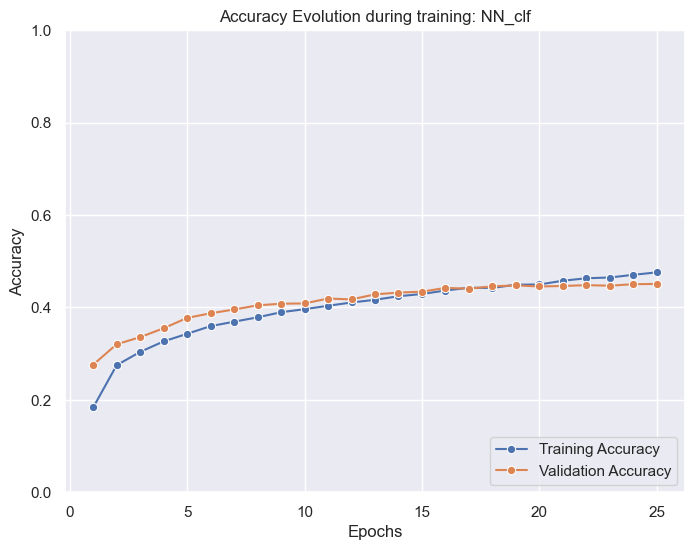

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='lower right')#loc='right'
plt.ylim(0,1)
# plt.ylim(0.3,0.5)
# plt.xlim(0,50)